<a href="https://colab.research.google.com/github/mollala/Internship/blob/DA/%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) 활동 소비내역과 숙박 소비내역 겹치는 지 확인

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import zipfile
import os

In [ ]:
#읽고자 하는 파일 지정
df1 = pd.read_csv("C:/연구인턴십/합친거/tn_activity_consume_his_활동소비내역.csv")
df2 = pd.read_csv("C:/연구인턴십/합친거/tn_lodge_consume_his_숙박소비내역.csv")

ts1 = df1
ts2 = df2

In [ ]:
ts1

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,a_a004739,2210020002,3,0,0,1,2,NaN,아침고요수목원,경기 가평군 상면 수목원로 432,경기 가평군 상면 행현리 623-3,3216056.0,4.182033e+09,2022-10-02 00:00:00.000,1.0,22000.0,대인,NaN
1,a_a002397,2209170002,3,1,1,0,1,NaN,에버랜드,에버랜드로 199 삼성물산(주),NaN,NaN,NaN,NaN,4.0,33000.0,NaN,4.146125e+09
2,a_a017904,2211110007,1,0,0,1,2,5.918702e+09,금별맥주,서울 마포구 마포대로 110,서울 마포구 공덕동 255-16,2113001.0,1.144010e+09,2022-11-11 22:32:00.000,1.0,31400.0,봄베이토닉하이볼;호세쿠엘보;바지락버터술찜;파스타면,NaN
3,a_a018111,2211130004,1,0,0,1,2,3.328101e+09,주식회사필모어,경기 고양시 일산동구 일산로380번길 15,경기 고양시 일산동구 정발산동 1296-6,4379164.0,4.128510e+09,2022-11-13 14:10:00.000,1.0,48000.0,4.LASAGNA;7.GNOCCHI;COKE,NaN
4,a_a005012,2210120010,1,0,0,1,1,6.448101e+09,박가네푸드시스템 주식회사,서울 종로구 종로32길 7,서울 종로구 종로5가 138-10,4100322.0,1.111016e+09,2022-10-12 16:26:00.000,1.0,10000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86627,d_d009315,2210290002,1,0,0,1,4,2.148609e+09,㈜풀무원푸드앤컬처,충북 청주시 청원구 내수읍 오창대로 980,충북 청주시 청원구 내수읍 입상리 79-9,2014001.0,4.311425e+09,2022-10-29 07:51:00.000,1.0,29500.0,사골떡만두국;설렁탕,NaN
86628,d_d002223,2210090004,2,0,0,1,4,7.578702e+09,주식회사동문올레수산,제주특별자치도 제주시 관덕로14길 10,제주특별자치도 제주시 이도일동 1349-5,4847160.0,5.011010e+09,2022-10-09 20:30:00.000,1.0,60000.0,NaN,NaN
86629,d_d006862,2210230001,1,0,0,1,2,1.238648e+09,한라산아래첫마을영농조합법인,제주특별자치도 서귀포시 안덕면 산록남로 675,제주특별자치도 서귀포시 안덕면 광평리 211,3020010.0,5.013031e+09,2022-10-23 11:42:00.000,1.0,52000.0,비비작작면;사리추가;한우맑은곰탕;메밀조베기;메밀물냉면,NaN
86630,d_d001544,2210020005,1,0,0,1,4,1.592001e+09,대우정식당,제주특별자치도 서귀포시 이어도로 866-37,제주특별자치도 서귀포시 법환동 1552-2,3350237.0,5.013010e+09,2022-10-02 14:43:00.000,1.0,61000.0,NaN,NaN


In [ ]:
grouped = ts1.groupby('TRAVEL_ID')[['PAYMENT_DT', 'PAYMENT_MTHD_SE', 'PAYMENT_AMT_WON', 'PAYMENT_ETC']].apply(lambda x: x)

# 결과 출력
print(grouped)

                              PAYMENT_DT  PAYMENT_MTHD_SE  PAYMENT_AMT_WON  \
TRAVEL_ID                                                                    
a_a000007 52967  2022-08-21 00:00:00.000              1.0          12000.0   
          52989  2022-08-20 13:49:00.000              1.0          28800.0   
          59296  2022-08-21 12:04:00.000              1.0          57000.0   
          66044  2022-08-21 12:11:00.000              1.0          21000.0   
          67700  2022-08-19 11:38:00.000              1.0          18000.0   
...                                  ...              ...              ...   
d_d012490 54573  2022-11-12 13:25:00.000              1.0          17000.0   
          66378  2022-11-12 16:54:00.000              1.0          35000.0   
d_d012491 54842  2022-11-09 11:14:00.000              3.0          15200.0   
          64397  2022-11-09 18:42:00.000              3.0          15900.0   
d_d012492 70093  2022-11-13 12:56:00.000              1.0       

In [ ]:
grouped1 = ts1.groupby('TRAVEL_ID')

# TRAVEL_ID가 'a_a000007'인 그룹만 가져오기
group_a_a000007 = grouped1.get_group('a_a000007')

# 원하는 열만 선택
selected_columns = group_a_a000007[['PAYMENT_DT', 'PAYMENT_MTHD_SE', 'PAYMENT_AMT_WON', 'PAYMENT_ETC']]

# 결과 출력
print(selected_columns)

                    PAYMENT_DT  PAYMENT_MTHD_SE  PAYMENT_AMT_WON  \
52967  2022-08-21 00:00:00.000              1.0          12000.0   
52989  2022-08-20 13:49:00.000              1.0          28800.0   
59296  2022-08-21 12:04:00.000              1.0          57000.0   
66044  2022-08-21 12:11:00.000              1.0          21000.0   
67700  2022-08-19 11:38:00.000              1.0          18000.0   
73166  2022-08-19 15:12:00.000              1.0         165000.0   
74099  2022-08-19 11:36:00.000              1.0          30000.0   
81608  2022-08-21 00:00:00.000              1.0          11000.0   
81718  2022-08-19 13:26:00.000              1.0           6000.0   

                               PAYMENT_ETC  
52967                             [국수]소치정식  
52989      과일모찌슬라임세트;1000바나나주물럭;키친라이프)무선스템  
59296                       루지&곤돌라 1회권(주말)  
66044                   [탐탐]딸기주스;[탐탐]레몬에이드  
67700          명란바케트;앙금빵;프렌치피크닉(육쪽);수제 찹살떡  
73166                                  NaN  
7409

In [ ]:
grouped2 = ts2.groupby('TRAVEL_ID')

# TRAVEL_ID가 'a_a000007'인 그룹만 가져오기
group_a_a000007_1 = grouped2.get_group('a_a000007')

# 원하는 열만 선택
selected_columns2 = group_a_a000007_1[['PAYMENT_DT', 'PAYMENT_MTHD_SE', 'PAYMENT_AMT_WON', 'PAYMENT_ETC']]

# 결과 출력
print(selected_columns2)

     PAYMENT_DT  PAYMENT_MTHD_SE  PAYMENT_AMT_WON PAYMENT_ETC
7309        NaN              1.0          1400000         NaN


In [ ]:
ts2

,TRAVEL_ID,LODGING_NM,LODGING_PAYMENT_SEQ,LODGING_TYPE_CD,RSVT_YN,CHK_IN_DT_MIN,CHK_OUT_DT_MIN,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC
0,a_a000290,솔잎향캠핑파크,1,5,Y,2022-08-24 00:00:00.000,2022-08-25 00:00:00.000,4,NaN,솔잎향캠핑파크,경기 시흥시 수인로2107번길 52,경기 시흥시 조남동 583-2,4397339.0,4.139012e+09,NaN,1.0,160000,글램핑(1)
1,a_a000805,고구마모텔,1,2,Y,2022-09-04 00:00:00.000,2022-09-06 00:00:00.000,1,1.753401e+09,호텔고구마,서울 마포구 백범로4길 16,서울 마포구 노고산동 106-77,4139251.0,1.144011e+09,2022-09-04 20:07:00.000,1.0,100000,NaN
2,a_a012504,공군호텔,1,1,Y,2022-11-03 00:00:00.000,2022-11-04 00:00:00.000,1,1.188300e+09,공군항공안전단,서울 영등포구 여의대방로 259,서울 영등포구 신길동 1196,3118028.0,1.156013e+09,2022-11-03 16:39:00.000,1.0,36000,NaN
3,a_a001356,호텔스카이파크 센트럴명동점,1,1,Y,2022-08-27 00:00:00.000,2022-08-28 00:00:00.000,1,NaN,T-STAY센트럴명동점,NaN,NaN,NaN,NaN,2022-08-06 00:00:00.000,1.0,102460,센트럴명동점 스탠다드더블객실1박+미니바무료이용
4,a_a003139,스테이카키,1,7,Y,2022-09-24 00:00:00.000,2022-09-25 00:00:00.000,4,NaN,스테이카키,서울 용산구 이태원로36길 19-8,서울 용산구 한남동 686-11,4106314.0,1.117013e+09,2022-07-11 05:23:00.000,1.0,340000,1F/성인 4명
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10051,d_d005318,마요피갤러리,1,7,Y,2022-10-28 00:00:00.000,2022-10-30 00:00:00.000,2,NaN,마요피갤러리,제주특별자치도 제주시 구좌읍 하도동길 27-38,제주특별자치도 제주시 구좌읍 하도리 513-5,4848977.0,5.011026e+09,2022-10-28 00:00:00.000,3.0,170000,게스트하우스비
10052,d_d001666,소곤닥하우스,0,7,Y,2022-10-01 00:00:00.000,2022-10-02 00:00:00.000,1,NaN,NaN,제주특별자치도 제주시 조천읍 신북로 497,제주특별자치도 제주시 조천읍 함덕리 1240-1,NaN,NaN,NaN,1.0,59000,NaN
10053,d_d009398,아라팰리스호텔,0,1,Y,2022-11-05 00:00:00.000,2022-11-06 00:00:00.000,1,NaN,NaN,제주특별자치도 제주시 남성로26길 26,제주특별자치도 제주시 삼도이동 228-32,NaN,NaN,NaN,1.0,70000,NaN
10054,d_d000543,스플래시리조트,0,4,Y,2022-08-19 00:00:00.000,2022-08-22 00:00:00.000,3,NaN,NaN,제주특별자치도 서귀포시 솔동산로 28,제주특별자치도 서귀포시 서귀동 644-3,NaN,NaN,NaN,3.0,270000,NaN


2. 변수 선택 및 확인 작업

In [ ]:
### 코드A, 코드B로 1,2,3 이런 거 확인 가능!!!!!!!!!!!!!!

dframe = pd.read_csv('C:/연구인턴십/합친거/tc_codeb_코드B.csv')

filtered_df = dframe[dframe['cd_a'] == 'ACT']

# 필터링된 결과 출력
print(filtered_df)

      idx            cd_nm cd_a cd_b  \
63   1055               취식  ACT    1   
64   1056          쇼핑 / 구매  ACT    2   
65   1057  체험 활동 / 입장 및 관람  ACT    3   
66   1058  단순 구경 / 산책 / 걷기  ACT    4   
67   1059               휴식  ACT    5   
68   1060            기타 활동  ACT    6   
102  1094            환승/경유  ACT    7   
104  1096               없음  ACT   99   

                                              cd_memo  cd_memo2 del_flag  \
63                                                NaN       NaN        N   
64    (아이 쇼핑 포함)<br>* 이전 방문지에서 해당 방문지 이동 중 구매한 내역 포함        NaN        N   
65                                                NaN       NaN        N   
66                                                NaN       NaN        N   
67                                                NaN       NaN        N   
68                                                NaN       NaN        N   
102                                               NaN       NaN        N   
104                            

3. 데이터테이블 하나로 합치기

<중복되는 값이 있는 지 확인>

tn_activity_consume_his_활동소비내역_A.csv(중복)
tn_activity_his_활동내역_A.csv(중복), tn_companion_info_동반자정보_A.csv(중복)
tn_lodge_consume_his_숙박소비내역_A.csv(중복), tn_move_his_이동내역_A.csv(중복), tn_mvmn_consume_his_이동수단소비내역_A.csv(중복)
tn_traveller_master_여행객 Master_A.csv(유니크), tn_travel_여행_A.csv(유니크), tn_visit_area_info_방문지정보_A.csv(중복)

---- 중복되는 값이 있는 경우 ----

In [ ]:
df1 = pd.read_csv('C:/연구인턴십/합친거/tn_companion_info_동반자정보.csv')
df2 = pd.read_csv('C:/연구인턴십/하나로만든거/여행이랑_여행객.csv')

In [ ]:
df1

,COMPANION_SEQ,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION
0,9,a_a003353,10,1,3,2
1,1,a_a007584,7,2,3,3
2,2,a_a003406,2,2,1,1
3,1,a_a004691,1,1,6,1
4,1,a_a008467,8,2,4,1
...,...,...,...,...,...,...
18713,4,c_c000260,7,1,4,3
18714,1,d_d000210,8,2,4,1
18715,3,d_d000956,9,1,3,1
18716,2,d_d004858,2,1,1,1


In [ ]:
df2

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,INCOME,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_DAY
0,a000007,11.0,여,30.0,4.0,서울특별시,인천,3대 동반 여행(친척 포함),5.0,a_a000007,10;23;24;26;7;,2022-08-19,2022-08-22,자가용,4.0
1,a000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_a000011,22;24;26;27;7;,2022-08-06,2022-08-08,자가용,3.0
2,a000012,28.0,남,30.0,5.0,인천광역시,경기,나홀로 여행,0.0,a_a000012,22;23;26;3;6;,2022-08-09,2022-08-12,대중교통 등,4.0
3,a000013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_a000013,1;2;22;25;5;,2022-08-18,2022-08-21,자가용,4.0
4,a000014,11.0,남,50.0,12.0,서울특별시,경기,2인 여행(가족 외),7.0,a_a000014,10;2;3;5;8;,2022-08-14,2022-08-16,자가용,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15344,d012488,50.0,여,20.0,4.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012488,1;2;3;4;5;6;7;8;9;10;11;12;13;21;22;24;26;27;,2022-11-12,2022-11-13,NaN,2.0
15345,d012489,50.0,여,30.0,2.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012489,28;,2022-11-13,2022-11-14,NaN,2.0
15346,d012490,50.0,여,20.0,5.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012490,1;22;,2022-11-12,2022-11-13,NaN,2.0
15347,d012491,50.0,남,30.0,4.0,제주특별자치도,제주,2인 가족 여행,1.0,d_d012491,1;12;22;24;26;,2022-11-09,2022-11-10,NaN,2.0


In [ ]:
# TRAVEL_ID가 'a_a003353'인 행 필터링
filtered_df = ts2[ts2['TRAVEL_ID'] == 'a_a000011']

# 필터링된 결과 출력
print(filtered_df)


  TRAVELER_ID  RESIDENCE_SGG_CD GENDER  AGE_GRP  INCOME  \
1     a000011               NaN    NaN      NaN     NaN   

  TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY  \
1                     NaN                       NaN                     NaN   

   TRAVEL_COMPANIONS_NUM  TRAVEL_ID  TRAVEL_PURPOSE TRAVEL_START_YMD  \
1                    5.0  a_a000011  22;24;26;27;7;       2022-08-06   

  TRAVEL_END_YMD MVMN_NM  TRAVEL_DAY  
1     2022-08-08     자가용         3.0  


In [ ]:
df2['TRAVEL_COMPANIONS_NUM'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
15344    False
15345    False
15346    False
15347    False
15348     True
Name: TRAVEL_COMPANIONS_NUM, Length: 15349, dtype: bool

In [ ]:
df1['TRAVEL_ID'].nunique()

10335

In [ ]:
import pandas as pd

# df2의 복사본 생성
ts2 = df2.copy()

# df2에서 'TRAVEL_COMPANIONS_NUM'이 NaN인 행 필터링
df2_nan = ts2[ts2['TRAVEL_COMPANIONS_NUM'].isna()]

# df1에서 각 'TRAVEL_ID'별 동반자 수를 계산 (동반자 수는 행의 개수)
companions_count = df1.groupby('TRAVEL_ID').size().reset_index(name='companions_num')

# df2_nan과 companions_count를 TRAVEL_ID를 기준으로 병합하여 동반자 수 추가
df2_nan_updated = pd.merge(df2_nan, companions_count, on='TRAVEL_ID', how='left')

# 병합된 결과에서 companions_num 열을 TRAVEL_COMPANIONS_NUM에 업데이트
ts2.loc[ts2['TRAVEL_COMPANIONS_NUM'].isna(), 'TRAVEL_COMPANIONS_NUM'] = df2_nan_updated['companions_num'].values


In [ ]:
ts2['TRAVEL_COMPANIONS_NUM'].isna().sum()

936

In [ ]:
# df2에서 TRAVEL_COMPANIONS_NUM 열의 NaN 값을 0으로 대체
ts2['TRAVEL_COMPANIONS_NUM'] = ts2['TRAVEL_COMPANIONS_NUM'].fillna(0)

# 업데이트된 df2 확인
ts2['TRAVEL_COMPANIONS_NUM'].isna().sum()


0

In [ ]:
ts2

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,INCOME,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_DAY
0,a000007,11.0,여,30.0,4.0,서울특별시,인천,3대 동반 여행(친척 포함),5.0,a_a000007,10;23;24;26;7;,2022-08-19,2022-08-22,자가용,4.0
1,a000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,a_a000011,22;24;26;27;7;,2022-08-06,2022-08-08,자가용,3.0
2,a000012,28.0,남,30.0,5.0,인천광역시,경기,나홀로 여행,0.0,a_a000012,22;23;26;3;6;,2022-08-09,2022-08-12,대중교통 등,4.0
3,a000013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,a_a000013,1;2;22;25;5;,2022-08-18,2022-08-21,자가용,4.0
4,a000014,11.0,남,50.0,12.0,서울특별시,경기,2인 여행(가족 외),7.0,a_a000014,10;2;3;5;8;,2022-08-14,2022-08-16,자가용,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15344,d012488,50.0,여,20.0,4.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012488,1;2;3;4;5;6;7;8;9;10;11;12;13;21;22;24;26;27;,2022-11-12,2022-11-13,NaN,2.0
15345,d012489,50.0,여,30.0,2.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012489,28;,2022-11-13,2022-11-14,NaN,2.0
15346,d012490,50.0,여,20.0,5.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012490,1;22;,2022-11-12,2022-11-13,NaN,2.0
15347,d012491,50.0,남,30.0,4.0,제주특별자치도,제주,2인 가족 여행,1.0,d_d012491,1;12;22;24;26;,2022-11-09,2022-11-10,NaN,2.0


In [ ]:
df1 = pd.read_csv('C:/연구인턴십/합친거/tn_activity_consume_his_활동소비내역.csv')
df2 = pd.read_csv('C:/연구인턴십/하나로만든거/여행이랑_여행객.csv')

In [ ]:
df1['PAYMENT_ETC']

0                                   대인
1                                  NaN
2          봄베이토닉하이볼;호세쿠엘보;바지락버터술찜;파스타면
3             4.LASAGNA;7.GNOCCHI;COKE
4                                  NaN
                     ...              
86627                       사골떡만두국;설렁탕
86628                              NaN
86629    비비작작면;사리추가;한우맑은곰탕;메밀조베기;메밀물냉면
86630                              NaN
86631                     경양식뼈돈카츠;치즈카츠
Name: PAYMENT_ETC, Length: 86632, dtype: object

In [ ]:
# df2를 'TRAVEL_ID' 기준으로 내림차순 정렬
df2_sorted = df1.sort_values(by='TRAVEL_ID', ascending=True)

# 정렬된 df2 확인
df2_sorted

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
67700,a_a000007,2208190002,1,0,0,1,6,7.198102e+09,(주)조양방직,인천 강화군 강화읍 향나무길5번길 12,인천 강화군 강화읍 신문리 587,4271711.0,2.871025e+09,2022-08-19 11:38:00.000,1.0,18000.0,명란바케트;앙금빵;프렌치피크닉(육쪽);수제 찹살떡,NaN
52967,a_a000007,2208210002,1,0,0,2,6,1.168533e+09,해강개발(주)강화리조트,인천 강화군 길상면 장흥로 217,인천 강화군 길상면 선두리 산 343-2,3157033.0,2.871033e+09,2022-08-21 00:00:00.000,1.0,12000.0,[국수]소치정식,NaN
73166,a_a000007,2208190005,1,0,0,2,6,4.594100e+09,일오삼간장게장,인천 강화군 양도면 중앙로1052번길 16,인천 강화군 양도면 인산리 1189-1,4271590.0,2.871035e+09,2022-08-19 15:12:00.000,1.0,165000.0,NaN,NaN
52989,a_a000007,2208200001,2,1,1,1,5,8.548500e+09,꼬끼오강화외포리점,인천 강화군 내가면 중앙로 1291,인천 강화군 내가면 외포리 763-10,3150025.0,2.871036e+09,2022-08-20 13:49:00.000,1.0,28800.0,과일모찌슬라임세트;1000바나나주물럭;키친라이프)무선스템,NaN
59296,a_a000007,2208210002,3,1,1,2,3,1.168533e+09,해강개발(주)강화리조트,인천 강화군 길상면 장흥로 217,인천 강화군 길상면 선두리 산 343-2,3157033.0,2.871033e+09,2022-08-21 12:04:00.000,1.0,57000.0,루지&곤돌라 1회권(주말),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66378,d_d012490,2211120004,6,0,0,1,1,8.390901e+09,쌤시크노형점,제주특별자치도 제주시 월랑로 31,제주특별자치도 제주시 노형동 1055-12,3349169.0,5.011012e+09,2022-11-12 16:54:00.000,1.0,35000.0,디자인컷(여),NaN
54573,d_d012490,2211120003,1,0,0,1,1,5.520202e+09,칠분의오,제주특별자치도 제주시 구좌읍 해맞이해안로 650-20,제주특별자치도 제주시 구좌읍 행원리 574,3349242.0,5.011026e+09,2022-11-12 13:25:00.000,1.0,17000.0,마제소바 플레이트,NaN
54842,d_d012491,2211090002,1,0,0,1,2,2.018122e+09,주식회사 스타벅스 커피 코리아,제주특별자치도 제주시 서해안로 380,제주특별자치도 제주시 용담삼동 2572-4,3349093.0,5.011011e+09,2022-11-09 11:14:00.000,3.0,15200.0,G)토피 넛 라떼;I-G)제주금귤 민트T,NaN
64397,d_d012491,2211090011,1,0,0,1,2,2.018122e+09,주식회사 스타벅스 커피 코리아,제주특별자치도 서귀포시 안덕면 신화역사로304번길 38,NaN,4852219.0,5.013031e+09,2022-11-09 18:42:00.000,3.0,15900.0,I-T)R/E RCB SBI;G)쿨라임 FIZZ,NaN


In [ ]:
df1['TRAVEL_ID'].nunique()

7357

In [ ]:
# TRAVEL_ID가 중복된 값 확인
duplicate_ids = df1[df1.duplicated('TRAVEL_ID', keep=False)]

# 중복된 TRAVEL_ID를 가진 행만 필터링
print(duplicate_ids)


       TRAVEL_ID  VISIT_AREA_ID  ACTIVITY_TYPE_CD  ACTIVITY_TYPE_SEQ  \
0      a_a004739     2210020002                 3                  0   
1      a_a002397     2209170002                 3                  1   
2      a_a017904     2211110007                 1                  0   
4      a_a005012     2210120010                 1                  0   
5      a_a006402     2210080005                 2                  1   
...          ...            ...               ...                ...   
86627  d_d009315     2210290002                 1                  0   
86628  d_d002223     2210090004                 2                  0   
86629  d_d006862     2210230001                 1                  0   
86630  d_d001544     2210020005                 1                  0   
86631  b_b009828     2210200003                 1                  1   

       CONSUME_HIS_SEQ  CONSUME_HIS_SNO  PAYMENT_NUM          BRNO  \
0                    0                1            2           Na

In [ ]:
# 모든 열이 출력되도록 설정
pd.set_option('display.max_columns', None)

# TRAVEL_ID가 'a_a003353'인 행 필터링
filtered_df = df1[df1['TRAVEL_ID'] == 'd_d009315']

# 필터링된 결과 출력
print(filtered_df)

       TRAVEL_ID  VISIT_AREA_ID  ACTIVITY_TYPE_CD  ACTIVITY_TYPE_SEQ  \
53965  d_d009315     2210300006                 1                  0   
54167  d_d009315     2210310003                 3                  1   
54666  d_d009315     2210310004                 1                  0   
54695  d_d009315     2210310005                 1                  0   
57025  d_d009315     2210300007                 1                  0   
58010  d_d009315     2210290007                 6                  1   
66792  d_d009315     2210310003                 2                  2   
67832  d_d009315     2210300002                 3                  0   
68127  d_d009315     2210300002                 1                  1   
69806  d_d009315     2210300002                 2                  3   
70755  d_d009315     2210300005                 6                  1   
71447  d_d009315     2210310007                 1                  0   
74061  d_d009315     2210290009                 1               

---- 중복되는 값이 없는 경우 ----

In [ ]:
df1 = pd.read_csv('C:/연구인턴십/합친거/tn_traveller_master_여행객 Master.csv')
df2 = pd.read_csv('C:/연구인턴십/합친거/tn_travel_여행.csv')

In [ ]:
df1['TRAVELER_ID'].nunique()

12800

In [ ]:
df1

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,b015583,41,여,20,6,1.0,1.0,5,3.0,NaN,...,1,7,경기도,충남,2인 여행(가족 외),2022-10-29~2022-10-30,1.0,NaN,NaN,1
1,a001105,30,남,30,6,1.0,1.0,2,3.0,NaN,...,6,5,대전광역시,경기,3인 이상 여행(가족 외),2022-09-03~2022-09-04,3.0,NaN,NaN,7
2,a001673,41,여,30,4,1.0,2.0,3,NaN,1.0,...,2,7,경기도,서울,자녀 동반 여행,2022-09-18~2022-09-19,10.0,7.0,1.0,2
3,a017690,41,여,30,6,1.0,1.0,3,3.0,NaN,...,4,5,경기도,서울,3인 이상 여행(가족 외),2022-11-12~2022-11-12,3.0,1.0,2.0,3
4,c006666,28,여,30,6,1.0,1.0,3,13.0,NaN,...,5,5,인천광역시,경기,나홀로 여행,2022-10-18~2022-10-18,1.0,7.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,d002221,11,남,30,6,1.0,1.0,1,2.0,NaN,...,6,6,서울특별시,제주,2인 여행(가족 외),2022-10-02~2022-10-05,2.0,3.0,5.0,1
12796,d002109,41,여,30,5,1.0,1.0,1,3.0,NaN,...,2,7,경기도,제주,나홀로 여행,2022-10-04~2022-10-07,2.0,1.0,4.0,0
12797,d006910,50,여,30,5,1.0,1.0,1,4.0,NaN,...,6,7,제주특별자치도,제주,나홀로 여행,2022-10-18~2022-10-19,1.0,4.0,5.0,0
12798,d010634,11,여,20,6,1.0,1.0,4,3.0,NaN,...,2,7,서울특별시,제주,2인 여행(가족 외),2022-11-05~2022-11-07,2.0,5.0,1.0,1


In [ ]:
df2

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION,TRAVEL_MISSION_CHECK
0,a_a014262,A03,a014262,1;11;2;22;,2022-10-29,2022-10-30,자가용,NaN,1;11;2;22;,2;1;22
1,a_a006728,A03,a006728,21;24;5;22;26;27;,2022-10-10,2022-10-11,자가용,NaN,21;24;5;22;26;27;,6;1;22
2,a_a015745,A02,a015745,1;2;6;,2022-10-31,2022-11-03,대중교통 등,NaN,1;2;6;,13;3;28
3,a_a010544,A03,a010544,21;22;24;26;,2022-11-01,2022-11-02,자가용,NaN,21;22;24;26;,1;22;26
4,a_a012058,A03,a012058,1;4;10;12;21;22;26;,2022-11-05,2022-11-06,대중교통 등,수도권 외 거주 39세 이하 커플,1;4;10;12;21;22;26;,1;21;22
...,...,...,...,...,...,...,...,...,...,...
12795,b_b001198,D02,b001198,1;10;3;4;5;,2022-09-04,2022-09-06,자가용,NaN,1;10;3;4;5;,25;22;21
12796,d_d009222,D01,d009222,2;,2022-10-29,2022-10-31,자가용,NaN,2;,23;2;22
12797,d_d002847,D01,d002847,21;22;23;26;28;,2022-10-16,2022-10-19,대중교통 등,NaN,21;22;23;26;28;,21;26;22
12798,d_d003147,D01,d003147,7;21;22;26;,2022-10-29,2022-10-31,자가용,NaN,7;21;22;26;,21;1;6


In [ ]:
merged_df = pd.merge(df1, df2, on='TRAVELER_ID', how='outer')

# 병합 결과 확인
print(merged_df)

      TRAVELER_ID  RESIDENCE_SGG_CD GENDER  AGE_GRP  EDU_NM  EDU_FNSH_SE  \
0         a000007              11.0      여     30.0     7.0          1.0   
1         a000011               NaN    NaN      NaN     NaN          NaN   
2         a000012              28.0      남     30.0     6.0          1.0   
3         a000013               NaN    NaN      NaN     NaN          NaN   
4         a000014              11.0      남     50.0     7.0          1.0   
...           ...               ...    ...      ...     ...          ...   
15344     d012488              50.0      여     20.0     5.0          1.0   
15345     d012489              50.0      여     30.0     4.0          1.0   
15346     d012490              50.0      여     20.0     6.0          1.0   
15347     d012491              50.0      남     30.0     6.0          1.0   
15348     d012492               NaN    NaN      NaN     NaN          NaN   

       MARR_STTS  FAMILY_MEMB  JOB_NM  JOB_ETC  ...  TRAVEL_COMPANIONS_NUM  \
0        

In [ ]:
# 모든 열 이름 출력
print(merged_df.columns)

Index(['TRAVELER_ID', 'RESIDENCE_SGG_CD', 'GENDER', 'AGE_GRP', 'EDU_NM',
       'EDU_FNSH_SE', 'MARR_STTS', 'FAMILY_MEMB', 'JOB_NM', 'JOB_ETC',
       'INCOME', 'HOUSE_INCOME', 'TRAVEL_TERM', 'TRAVEL_NUM',
       'TRAVEL_LIKE_SIDO_1', 'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SIDO_2',
       'TRAVEL_LIKE_SGG_2', 'TRAVEL_LIKE_SIDO_3', 'TRAVEL_LIKE_SGG_3',
       'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
       'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
       'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION',
       'TRAVEL_STATUS_ACCOMPANY', 'TRAVEL_STATUS_YMD', 'TRAVEL_MOTIVE_1',
       'TRAVEL_MOTIVE_2', 'TRAVEL_MOTIVE_3', 'TRAVEL_COMPANIONS_NUM',
       'TRAVEL_ID', 'TRAVEL_NM', 'TRAVEL_PURPOSE', 'TRAVEL_START_YMD',
       'TRAVEL_END_YMD', 'MVMN_NM', 'TRAVEL_PERSONA', 'TRAVEL_MISSION',
       'TRAVEL_MISSION_CHECK'],
      dtype='object')


In [ ]:
# 필요없는 변수 삭제
merged_df = merged_df[['TRAVELER_ID', 'RESIDENCE_SGG_CD', 'GENDER', 'AGE_GRP',
       'INCOME',
       'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
       'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
       'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION',
       'TRAVEL_STATUS_ACCOMPANY', 'TRAVEL_STATUS_YMD', 'TRAVEL_MOTIVE_1',
       'TRAVEL_MOTIVE_2', 'TRAVEL_MOTIVE_3', 'TRAVEL_COMPANIONS_NUM',
       'TRAVEL_ID', 'TRAVEL_PURPOSE', 'TRAVEL_START_YMD',
       'TRAVEL_END_YMD', 'MVMN_NM']]

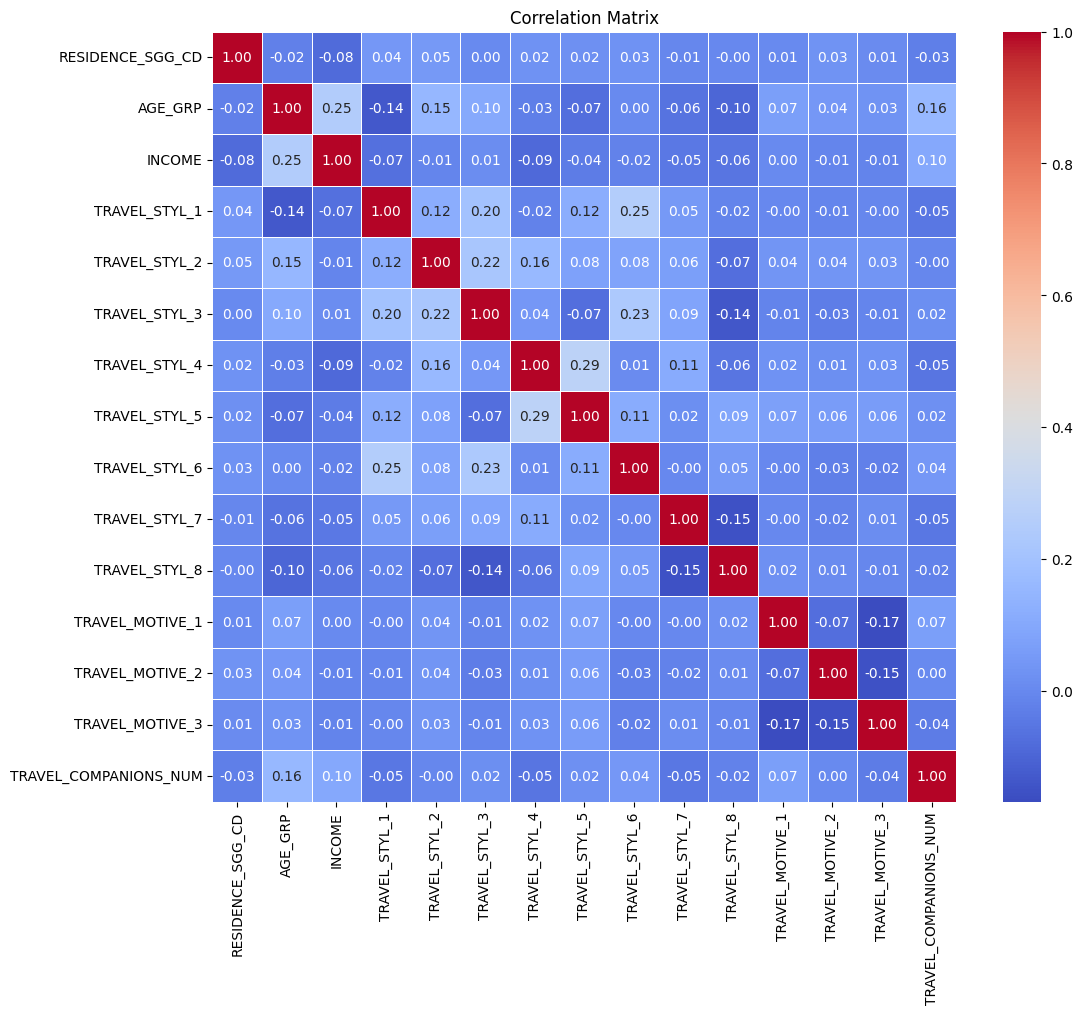

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tr = merged_df

# 상관계수 행렬 계산(숫자만)
correlation_matrix = tr.select_dtypes(include=[float, int]).corr()


# heatmap으로 상관계수 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# TRAVEL_STATUS_YMD 는 시작~끝 을 모두 나타낸 변수기 때문에 START_YMD와 END_YMD랑 겹침
# 따라서 없애도 될 것 같음. 근데 같은 사람이 다르게 적은 경우도 있음. 일단 이건 보류하고 걍 삭제하겠음

tr[['TRAVELER_ID', 'TRAVEL_STATUS_YMD']]


,TRAVELER_ID,TRAVEL_STATUS_YMD
0,a000007,2022-08-19~2022-08-21
1,a000011,NaN
2,a000012,2022-08-08~2022-08-10
3,a000013,NaN
4,a000014,2022-08-14~2022-08-15
...,...,...
15344,d012488,2022-11-12~2022-11-12
15345,d012489,2022-11-13~2022-11-13
15346,d012490,2022-11-12~2022-11-12
15347,d012491,2022-11-09~2022-11-09


In [ ]:
tr[['TRAVELER_ID', 'TRAVEL_START_YMD']]

,TRAVELER_ID,TRAVEL_START_YMD
0,a000007,2022-08-19
1,a000011,2022-08-06
2,a000012,2022-08-09
3,a000013,2022-08-18
4,a000014,2022-08-14
...,...,...
15344,d012488,2022-11-12
15345,d012489,2022-11-13
15346,d012490,2022-11-12
15347,d012491,2022-11-09


In [ ]:
tr = tr.drop(columns = ['TRAVEL_STATUS_YMD'])

In [ ]:
print(tr.columns)

Index(['TRAVELER_ID', 'RESIDENCE_SGG_CD', 'GENDER', 'AGE_GRP', 'INCOME',
       'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
       'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
       'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION',
       'TRAVEL_STATUS_ACCOMPANY', 'TRAVEL_MOTIVE_1', 'TRAVEL_MOTIVE_2',
       'TRAVEL_MOTIVE_3', 'TRAVEL_COMPANIONS_NUM', 'TRAVEL_ID',
       'TRAVEL_PURPOSE', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'MVMN_NM'],
      dtype='object')


In [ ]:
# 여행 스타일, 여행동기 삭제 왜냐면 여행 목적이라는 게 있기 떄문에
# 필요없는 변수 삭제
tr = tr[['TRAVELER_ID', 'RESIDENCE_SGG_CD', 'GENDER', 'AGE_GRP', 'INCOME',
       'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION',
       'TRAVEL_STATUS_ACCOMPANY', 'TRAVEL_COMPANIONS_NUM', 'TRAVEL_ID',
       'TRAVEL_PURPOSE', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'MVMN_NM']]

In [ ]:
# 'YYYY-MM-DD' 형식으로 저장된 문자열을 datetime 형식으로 변환
tr['TRAVEL_END_YMD'] = pd.to_datetime(tr['TRAVEL_END_YMD'], format='%Y-%m-%d')
tr['TRAVEL_START_YMD'] = pd.to_datetime(tr['TRAVEL_START_YMD'], format='%Y-%m-%d')

# 두 날짜의 차이를 계산하고 1을 더해서 여행 기간을 구함
tr['TRAVEL_DAY'] = (tr['TRAVEL_END_YMD'] - tr['TRAVEL_START_YMD']).dt.days + 1

tr

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,INCOME,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_DAY
0,a000007,11.0,여,30.0,4.0,서울특별시,인천,3대 동반 여행(친척 포함),5.0,a_a000007,10;23;24;26;7;,2022-08-19,2022-08-22,자가용,4.0
1,a000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_a000011,22;24;26;27;7;,2022-08-06,2022-08-08,자가용,3.0
2,a000012,28.0,남,30.0,5.0,인천광역시,경기,나홀로 여행,0.0,a_a000012,22;23;26;3;6;,2022-08-09,2022-08-12,대중교통 등,4.0
3,a000013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_a000013,1;2;22;25;5;,2022-08-18,2022-08-21,자가용,4.0
4,a000014,11.0,남,50.0,12.0,서울특별시,경기,2인 여행(가족 외),7.0,a_a000014,10;2;3;5;8;,2022-08-14,2022-08-16,자가용,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15344,d012488,50.0,여,20.0,4.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012488,1;2;3;4;5;6;7;8;9;10;11;12;13;21;22;24;26;27;,2022-11-12,2022-11-13,NaN,2.0
15345,d012489,50.0,여,30.0,2.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012489,28;,2022-11-13,2022-11-14,NaN,2.0
15346,d012490,50.0,여,20.0,5.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012490,1;22;,2022-11-12,2022-11-13,NaN,2.0
15347,d012491,50.0,남,30.0,4.0,제주특별자치도,제주,2인 가족 여행,1.0,d_d012491,1;12;22;24;26;,2022-11-09,2022-11-10,NaN,2.0


In [ ]:
# TRAVELER_ID는 모두 있지만 TRAVEL_ID는 없는 사람들이 존재한다.
### 둘의 차이는 무엇??
# TRAVEL_ID 열에서 NaN 값의 개수 확인

tr['TRAVEL_ID'].isna().sum()


2549

In [ ]:
# TRAVEL_PURPOSE 열을 세미콜론(;)으로 분리
tr['TRAVEL_PURPOSE_SPLIT'] = tr['TRAVEL_PURPOSE'].str.split(';')

# 리스트를 개별 항목으로 펼쳐서 시리즈로 변환
split_purposes = tr['TRAVEL_PURPOSE_SPLIT'].explode()

# 각 항목을 카운트
purpose_counts = split_purposes.value_counts()

# 'TRAVEL_PURPOSE_SPLIT' 열 제거
purpose_counts = purpose_counts.drop(columns=['TRAVEL_PURPOSE_SPLIT'])

# 결과 출력
print(purpose_counts)


TRAVEL_PURPOSE_SPLIT
      12799
22     6528
1      4613
2      3971
4      3697
3      3564
6      3477
21     2850
26     2436
24     2405
5      2295
23     2069
9      1704
27     1591
28     1458
12     1179
7      1056
11      977
8       956
10      948
13      494
25      375
Name: count, dtype: int64


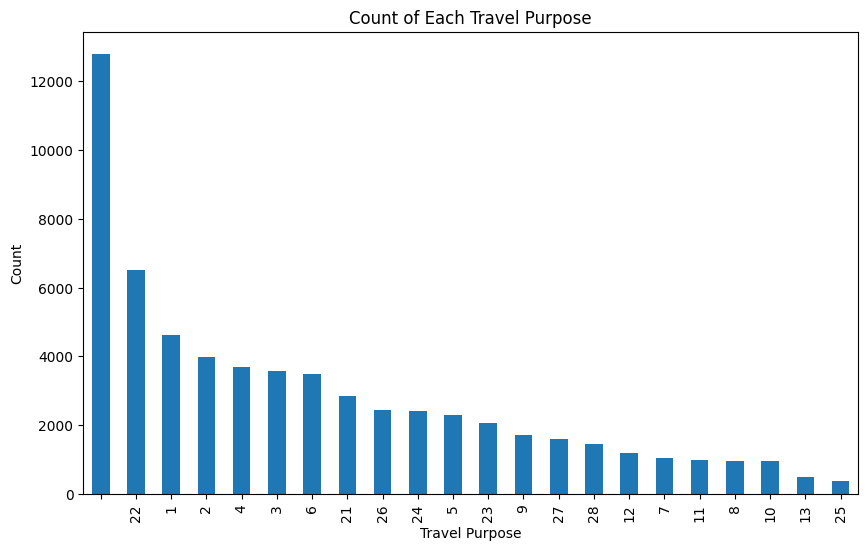

In [ ]:
import matplotlib.pyplot as plt

# 막대그래프 그리기
purpose_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Each Travel Purpose')
plt.xlabel('Travel Purpose')
plt.ylabel('Count')
plt.show()

<상위 5개 목적>
22 : SNS 인생샷 여행
1 : 쇼핑
2 : 테마파크, 놀이시설, 동/식물원 방문
4 : 시티투어
3 : 역사 유적지 방문

In [ ]:
tr

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,INCOME,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_DAY
0,a000007,11.0,여,30.0,4.0,서울특별시,인천,3대 동반 여행(친척 포함),5.0,a_a000007,10;23;24;26;7;,2022-08-19,2022-08-22,자가용,4.0
1,a000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_a000011,22;24;26;27;7;,2022-08-06,2022-08-08,자가용,3.0
2,a000012,28.0,남,30.0,5.0,인천광역시,경기,나홀로 여행,0.0,a_a000012,22;23;26;3;6;,2022-08-09,2022-08-12,대중교통 등,4.0
3,a000013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_a000013,1;2;22;25;5;,2022-08-18,2022-08-21,자가용,4.0
4,a000014,11.0,남,50.0,12.0,서울특별시,경기,2인 여행(가족 외),7.0,a_a000014,10;2;3;5;8;,2022-08-14,2022-08-16,자가용,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15344,d012488,50.0,여,20.0,4.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012488,1;2;3;4;5;6;7;8;9;10;11;12;13;21;22;24;26;27;,2022-11-12,2022-11-13,NaN,2.0
15345,d012489,50.0,여,30.0,2.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012489,28;,2022-11-13,2022-11-14,NaN,2.0
15346,d012490,50.0,여,20.0,5.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012490,1;22;,2022-11-12,2022-11-13,NaN,2.0
15347,d012491,50.0,남,30.0,4.0,제주특별자치도,제주,2인 가족 여행,1.0,d_d012491,1;12;22;24;26;,2022-11-09,2022-11-10,NaN,2.0


-- 저장 단계 --

In [ ]:
## 저장!!

# 저장할 디렉토리 설정
output_dir = "C:\연구인턴십\하나로만든거"

# 저장할 파일 경로 설정
output_file_path = os.path.join(output_dir, '여행이랑_여행객.csv')

ts2.to_csv(output_file_path, index=False)

In [ ]:
ts = pd.read_csv('C:/연구인턴십/하나로만든거/여행이랑_여행객.csv')
ts

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,INCOME,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_DAY
0,a000007,11.0,여,30.0,4.0,서울특별시,인천,3대 동반 여행(친척 포함),5.0,a_a000007,10;23;24;26;7;,2022-08-19,2022-08-22,자가용,4.0
1,a000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,a_a000011,22;24;26;27;7;,2022-08-06,2022-08-08,자가용,3.0
2,a000012,28.0,남,30.0,5.0,인천광역시,경기,나홀로 여행,0.0,a_a000012,22;23;26;3;6;,2022-08-09,2022-08-12,대중교통 등,4.0
3,a000013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,a_a000013,1;2;22;25;5;,2022-08-18,2022-08-21,자가용,4.0
4,a000014,11.0,남,50.0,12.0,서울특별시,경기,2인 여행(가족 외),7.0,a_a000014,10;2;3;5;8;,2022-08-14,2022-08-16,자가용,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15344,d012488,50.0,여,20.0,4.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012488,1;2;3;4;5;6;7;8;9;10;11;12;13;21;22;24;26;27;,2022-11-12,2022-11-13,NaN,2.0
15345,d012489,50.0,여,30.0,2.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012489,28;,2022-11-13,2022-11-14,NaN,2.0
15346,d012490,50.0,여,20.0,5.0,제주특별자치도,제주,나홀로 여행,0.0,d_d012490,1;22;,2022-11-12,2022-11-13,NaN,2.0
15347,d012491,50.0,남,30.0,4.0,제주특별자치도,제주,2인 가족 여행,1.0,d_d012491,1;12;22;24;26;,2022-11-09,2022-11-10,NaN,2.0
